In [1]:
from scipy.optimize import minimize
import pandas as pd

In [2]:
df_ini=pd.read_csv('All_Games_Stats.csv',names=['GAMEID','GAMEDATE','HOME_TEAM','HOME_TEAM_INDEX','AWAY_TEAM','AWAY_TEAM_INDEX','HOME_TEAM_SCORE','AWAY_TEAM_SCORE','OVERTIME_FLAG'],skiprows=2)

In [3]:
df=df_ini[df_ini['GAMEID'].astype(str).str.startswith('2022')]

In [4]:
df["ACTUAL_SPREAD"]=df["HOME_TEAM_SCORE"]-df["AWAY_TEAM_SCORE"]
df.reset_index(inplace=True)

/var/folders/24/s0t2htkj4ns689m4x6zy50jw0000gn/T/ipykernel_80000/1651319750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ACTUAL_SPREAD"]=df["HOME_TEAM_SCORE"]-df["AWAY_TEAM_SCORE"]


In [5]:
x=[0]*38

In [6]:
n=df.shape[0]

In [7]:
def o(x):
    sse=0
    for i in range(n):
        p_s=x[df['HOME_TEAM_INDEX'][i]-1]-x[df['AWAY_TEAM_INDEX'][i]-1]+x[37]
        p_e=df['ACTUAL_SPREAD'][i]-p_s
        p_es=p_e**2
        sse+=p_es
    return sse
def c(x):
    a=0
    for i in range(38):
        a+=x[i]
    av=a/37
    return 85-av

In [8]:
const1 = {'type':'eq', 'fun': c}
cons=[const1]

In [9]:
optNLP = minimize(o,[85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,2],tol=1e-8,constraints=cons) 


In [10]:
optNLP.x

array([85.29458021, 85.22668732, 85.70712635, 85.32030081, 83.78492236,
       85.02468306, 84.62415888, 84.99486179, 84.99486179, 85.67329006,
       85.82565243, 84.34463774, 84.99486179, 85.32524295, 84.12387066,
       85.43440768, 84.45541271, 84.08484156, 84.9921659 , 85.18790755,
       85.68437339, 84.99486179, 85.18151267, 85.67193987, 83.35171507,
       85.77793843, 85.58124409, 84.96234411, 84.1021334 , 84.90525425,
       84.91638543, 83.60605156, 84.82832394, 86.49997871, 84.54269815,
       85.78589911, 84.99486179,  0.19801099])

In [11]:
r=pd.Series(optNLP.x)

In [12]:
optNLP.fun

8415.814444050657

In [13]:
df['PREDICTED_SPREAD']=0
for i in range(n):
    df['PREDICTED_SPREAD'][i]=r[df['HOME_TEAM_INDEX'][i]-1]-r[df['AWAY_TEAM_INDEX'][i]-1]+r[37]
df['Mult']=df['ACTUAL_SPREAD']*df['PREDICTED_SPREAD']
df['Correct_Pred']=df['Mult'].apply(lambda x: 1 if x > 0 else 0)
df['Correct_Pred'].sum()

/var/folders/24/s0t2htkj4ns689m4x6zy50jw0000gn/T/ipykernel_80000/1492133158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PREDICTED_SPREAD']=0
/var/folders/24/s0t2htkj4ns689m4x6zy50jw0000gn/T/ipykernel_80000/1492133158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PREDICTED_SPREAD'][i]=r[df['HOME_TEAM_INDEX'][i]-1]-r[df['AWAY_TEAM_INDEX'][i]-1]+r[37]
/var/folders/24/s0t2htkj4ns689m4x6zy50jw0000gn/T/ipykernel_80000/1492133158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

879

In [14]:
r

0     85.294580
1     85.226687
2     85.707126
3     85.320301
4     83.784922
5     85.024683
6     84.624159
7     84.994862
8     84.994862
9     85.673290
10    85.825652
11    84.344638
12    84.994862
13    85.325243
14    84.123871
15    85.434408
16    84.455413
17    84.084842
18    84.992166
19    85.187908
20    85.684373
21    84.994862
22    85.181513
23    85.671940
24    83.351715
25    85.777938
26    85.581244
27    84.962344
28    84.102133
29    84.905254
30    84.916385
31    83.606052
32    84.828324
33    86.499979
34    84.542698
35    85.785899
36    84.994862
37     0.198011
dtype: float64

In [15]:
df1=pd.DataFrame()
df1['HOME_TEAM']=df_ini['AWAY_TEAM']
df1['HOME_TEAM_INDEX']=df_ini['AWAY_TEAM_INDEX']

result = pd.concat([df_ini[['HOME_TEAM','HOME_TEAM_INDEX']], df1[['HOME_TEAM','HOME_TEAM_INDEX']]], axis=0)


In [16]:
teams=result[['HOME_TEAM','HOME_TEAM_INDEX']].drop_duplicates().sort_values('HOME_TEAM_INDEX').reset_index()

In [17]:
teams['HOME_TEAM_INDEX']-=1

In [18]:
t=pd.DataFrame()
t['HOME_TEAM']=teams['HOME_TEAM'].append(pd.Series(['HT_ADV']),ignore_index=True)
t['HOME_TEAM_INDEX']=teams['HOME_TEAM_INDEX'].append(pd.Series([37]),ignore_index=True)
t

/var/folders/24/s0t2htkj4ns689m4x6zy50jw0000gn/T/ipykernel_80000/1284971527.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t['HOME_TEAM']=teams['HOME_TEAM'].append(pd.Series(['HT_ADV']),ignore_index=True)
/var/folders/24/s0t2htkj4ns689m4x6zy50jw0000gn/T/ipykernel_80000/1284971527.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t['HOME_TEAM_INDEX']=teams['HOME_TEAM_INDEX'].append(pd.Series([37]),ignore_index=True)


,HOME_TEAM,HOME_TEAM_INDEX
0,FLA,0
1,LAK,1
2,NJD,2
3,TBL,3
4,CHI,4
5,CGY,5
6,VAN,6
7,ATL,7
8,L.A,8
9,NYR,9


In [19]:
t['Rating']=r

In [20]:
t

,HOME_TEAM,HOME_TEAM_INDEX,Rating
0,FLA,0,85.294580
1,LAK,1,85.226687
2,NJD,2,85.707126
3,TBL,3,85.320301
4,CHI,4,83.784922
5,CGY,5,85.024683
6,VAN,6,84.624159
7,ATL,7,84.994862
8,L.A,8,84.994862
9,NYR,9,85.673290


In [21]:
t.to_csv('Ratings.csv')

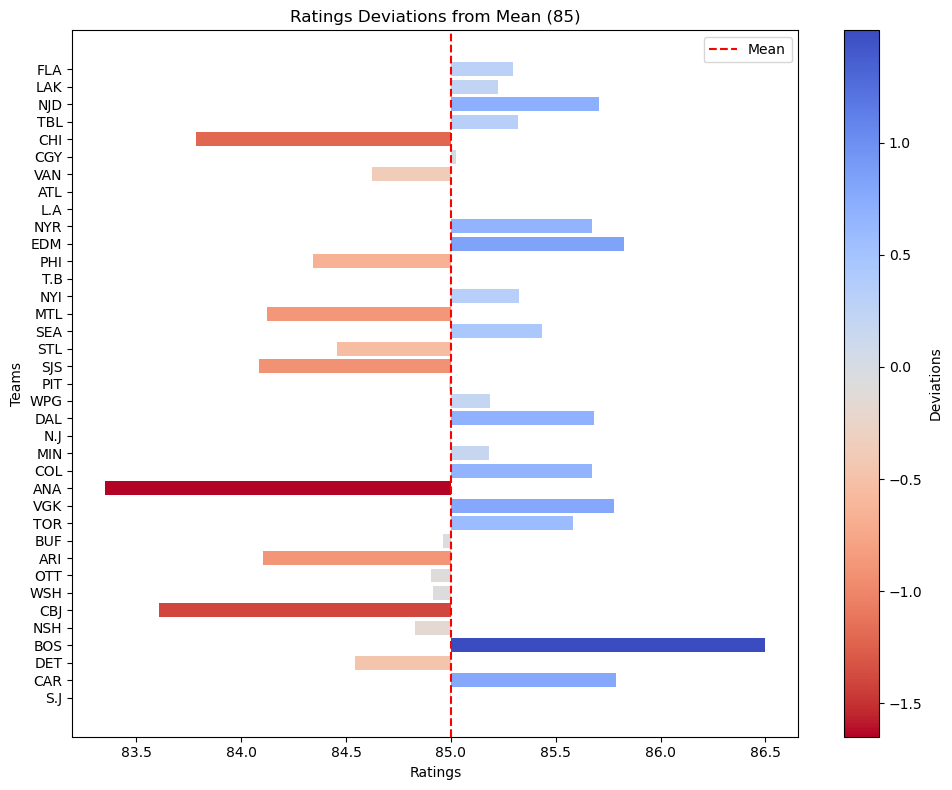

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
readings = r[:-1]
labels = t['HOME_TEAM'][:-1]
mean_value = 85  # Mean of the readings

shifted_deviations = np.array([value - mean_value for value in readings])

# Define a colormap
cmap = plt.get_cmap('coolwarm_r')  # You can choose different colormaps

# Normalize deviations to range between 0 and 1 for color mapping
norm = plt.Normalize(shifted_deviations.min(), shifted_deviations.max())
colors = cmap(norm(shifted_deviations))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bars centered around 85 with colored bars based on deviations
y_pos = range(len(readings))
bars = ax.barh(y_pos, shifted_deviations, left=mean_value, color=colors)

# Highlight the mean with a red line
ax.axvline(mean_value, color='red', linestyle='--', label='Mean')

# Set y-axis ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # Invert y-axis to have the highest value at the top

# Set labels and title
ax.set_xlabel('Ratings')
ax.set_ylabel('Teams')
ax.set_title('Ratings Deviations from Mean (85)')

# Create a colorbar to show the mapping of colors to deviations
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Deviations')

# Show legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()